In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (60000,784))/255.0
x_test = np.reshape(x_test, (10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])

# Input 784 nodes (28x28 pixel)
print(x_train.shape)
# 10 output nodes represent digital numbers ranging from 0 to 9.
print(y_train.shape)

(60000, 784)
(60000, 10)


In [2]:
# Define active function.

def sigmoid(x):
     return 1. / (1. +np.exp(-x))
def softmax(x):
     return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

In [3]:
def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
     zh1 = X@Wh1.T + bh1
     a = sigmoid(zh1) # output of layer 1

     zh2 = a@Wh2.T + bh2 
     b = sigmoid(zh2) # output of layer 2

     z = b@Wo.T + bo
     o = softmax(z) # output 
     return o
    
def AccTest(label,prediction): # calculate the matching score
     OutMaxArg=np.argmax(prediction,axis=1)
     LabelMaxArg=np.argmax(label,axis=1)
     Accuracy=np.mean(OutMaxArg==LabelMaxArg)
     return Accuracy

def dropOutMask(node, probability):
     temp = np.random.choice(2, (200,512), p = [probability, 1-probability])
     return temp*0.5


In [4]:
learningRate = 0.1
Epoch = 100
NumTrainSamples = 60000
NumTestSamples = 10000
NumInputs = 784
NumHiddenUnits = 512
NumClasses = 10

#inital weights
#hidden layer 1 = 784 x 512
Wh1 = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1 = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1 = np.zeros((NumHiddenUnits,NumInputs))
dbh1 = np.zeros((1,NumHiddenUnits))

#hidden layer 2 = 512 x 512
Wh2 = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2 = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2 = np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2 = np.zeros((1,NumHiddenUnits))

#Output layer = 512 x 10
Wo = np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo = np.random.uniform(0,0.5,(1,NumClasses))
dWo = np.zeros((NumClasses,NumHiddenUnits))
dbo = np.zeros((1,NumClasses))

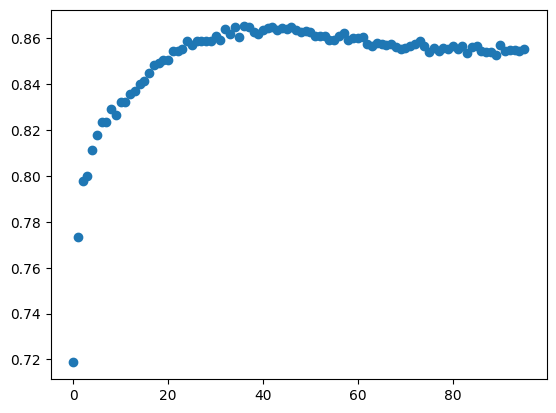

In [ ]:
from traitlets.traitlets import Undefined
from IPython.display import clear_output

loss = []
Acc = []
Batch_size = 200
dropOutProp = 0.5
Stochastic_samples = np.arange(NumTrainSamples)

for ep in range (Epoch):
 np.random.shuffle(Stochastic_samples)
 for ite in range(0,NumTrainSamples,Batch_size): 
     #making mask
     a_mask = dropOutMask((200,512), dropOutProp)
     b_mask = dropOutMask((200,512), dropOutProp)
     #feed fordware propagation
     Batch_samples = Stochastic_samples[ite:ite+Batch_size]
     x = x_train[Batch_samples,:]
     y = y_train[Batch_samples,:]
    
     zh1 = x@Wh1.T + bh1
     a_temp = sigmoid(zh1)
     a = np.multiply(a_mask,a_temp) #update mask
        
     zh2 = a@Wh2.T + bh2
     b_temp = sigmoid(zh2)
     b = np.multiply(b_mask,b_temp) #update mask
    
     z = b@Wo.T + bo
     o = softmax(z)
    
     #calculate loss
     loss.append(-np.sum(np.multiply(y,np.log10(o))))
    
     #calculate the error for the ouput layer
     d = o - y
    
     #Back propagate error
     dh2 = d@Wo
     dhs2 = np.multiply(np.multiply(dh2,b),(1-b))
        
     dh1 = dhs2@Wh2
     dhs1 = np.multiply(np.multiply(dh1,a),(1-a))

     # Update weight 
     dWo = np.matmul(np.transpose(d),b)
     dbo = np.mean(d) 
     dWh2 = np.matmul(np.transpose(dhs2),a)
     dbh2 = np.mean(dhs2)

     dWh1= np.matmul(np.transpose(dhs1),x)
     dbh1= np.mean(dhs1) 

     Wo = Wo - learningRate * dWo / Batch_size
     bo = bo - learningRate * dbo
     Wh2 = Wh2 - learningRate * dWh2 / Batch_size
     bh2 = bh2 - learningRate * dbh2
     Wh1 = Wh1 - learningRate * dWh1 / Batch_size
     bh1 = bh1 - learningRate * dbh1
    
 #Test accuracy with random innitial weights
 prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
 Acc.append(AccTest(y_test,prediction))
 clear_output(wait=True)
 plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
 plt.show()